In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
from Results_tables.experiment import text_to_df

%load_ext autoreload
%autoreload 2
# mpl.rc('font', family='serif', serif='cmr10')
# mpl.rc('axes.formatter', use_mathtext=True)

In [ ]:
def generate_line_plot(name, df, desc, numerical_x_axis=False, pretrained=True, root='./', y_range=None, tpi=False,
                       font_size=12, draw_zero=False, y_axis_label="mIoU Score"):
    print(name + ": " + desc)
    if not Path(root).exists(): Path(root).mkdir()
    if not Path(f'{name}').exists(): Path(f'{name}').mkdir()
    if not Path(f'no_legend/{name}').exists(): Path(f'no_legend/{name}').mkdir(parents=True)
    # Define the data
    models = df['Model']

    first_miou = [df.iloc[i, 1:5].values.tolist() for i in range(len(df))]
    second_miou = [df.iloc[i, 5:9].values.tolist() for i in range(len(df))]
    first_miou = [list(map(float, i)) for i in first_miou]
    second_miou = [list(map(float, i)) for i in second_miou]

    x_axis_labels = []
    if numerical_x_axis:
        x_axis_labels = [2.5, 5, 25, 50]
    elif tpi:
        x_axis_labels = ['', '2.5->5%', '5->25%', '25->50%']
    else:
        x_axis_labels = ['2.5%', '5%', '25%', '50%']

    # Create a figure and an axis object
    fig, ax = plt.subplots(figsize=(9, 5))

    # Plot the data
    colors = ['#377eb8', '#4daf4a', '#e41a1c', '#984ea3', '#ff7f00']
    markers = ['o', 's', '^', '*', 'D']
    handles = []
    labels = []
    for i in range(len(models)):
        if pretrained:
            first_suffix = '(pretrained)'
            second_suffix = '(random)'
        else:
            first_suffix = '(Validation)'
            second_suffix = '(50% Holdout)'

        first_label = models[i] + ' ' + first_suffix
        second_label = models[i] + ' ' + second_suffix
        if first_label not in [f'Random Forest {first_suffix}', f'XGBoost {first_suffix}']:
            handle, = ax.plot(x_axis_labels, first_miou[i], color=colors[i % len(colors)],
                              marker=markers[i % len(markers)], label=first_label, linewidth=2, markersize=6)
            handles.append(handle)
            labels.append(first_label)

        handle, = ax.plot(x_axis_labels, second_miou[i], '--', color=colors[i % len(colors)],
                          marker=markers[i % len(markers)], label=second_label, linewidth=1.5, markersize=6)
        handles.append(handle)
        labels.append(second_label)

    if draw_zero: ax.axhline(y=0, color='black', linestyle='--', linewidth=1)

    # Set the x-axis and y-axis labels
    x_axis_label = 'Training Percentage Increase (not to scale)' if tpi else 'Training Percentage (not to scale)'
    ax.set_xlabel(x_axis_label, fontsize=font_size)
    ax.set_ylabel(y_axis_label, fontsize=font_size)

    if draw_zero: ax.axhline(y=0, color='black', linestyle='--', linewidth=1)

    if y_range:
        ax.set_ylim(y_range)

    if numerical_x_axis:
        ax.set_xticks(x_axis_labels)
        # ax.set_xticklabels([f"{x}%" for x in x_axis_labels], fontsize=10)
        # ax.set_xlim(0, 55)

    # Set the plot title and legend
    # ax.set_title(f'{name}:\nmIoU scores for different models and pretraining percentages', fontsize=14, fontweight='bold')
    ax.legend(handles, labels, fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1))

    # Set the tick label font size
    ax.tick_params(axis='both', which='major', labelsize=10)

    # Set the background color of the plot
    # ax.set_facecolor('#f0f0f0')

    plt.tight_layout()
    plt.savefig(f'{root}{name} {desc}.pdf')
    plt.savefig(f'{name}/{name} {desc}.pdf')
    ax.legend().remove()
    plt.savefig(f'no_legend/{name}/{name} {desc}.pdf')

    plt.show()



In [ ]:
text = """Pointnet++	32.12	31.96	31.59	31.96	32.12	31.96	31.59	31.96
KPConv	73	92.8	95.27	96.34		91.88	95.04	96.32
Point-Transformer	89.09	83.08	72.39	76.88	86.6	72.04	72.05	43.32
Random Forest					77.44	89.4	92.56	95.12
XGBoost					76.08	84.52	92.5	91.98"""
scene = "Bagni Nerone"
desc = "Validation mIoU"

In [ ]:
df = text_to_df(text)
generate_line_plot(scene, df, desc, False)

In [ ]:
df = text_to_df("""Pointnet++	31.97	31.96	31.96	31.96	31.96	31.96	31.96	31.96
KPConv	43.84	66.28	89.33	93.94	36.54	90.24	92.23	93.86
Point-Transformer	38.98	70.38	15.05	76.7	63.75	63.75	63.75	63.75
Random Forest					69.79	84.93	94.4	95.21
XGBoost					80.85	85.91	95.27	91.68""")
generate_line_plot("Bagni Nerone", df, "50% Holdout mIoU")

# Bar plot
Bagni Nerone as a bar plot

In [ ]:
def generate_bar_plot(name, df, desc):
    models = df.Model

    pretrained_miou = [df.iloc[i, 1:5].values.tolist() for i in range(len(df))]
    random_miou = [df.iloc[i, 5:9].values.tolist() for i in range(len(df))]
    pretrained_miou = [list(map(float, i)) for i in pretrained_miou]
    random_miou = [list(map(float, i)) for i in random_miou]

    x_labels = ['2.5% (pretrained)', '5% (pretrained)', '25% (pretrained)', '50% (pretrained)', '2.5% (random)',
                '5% (random)', '25% (random)', '50% (random)']
    x_positions = np.arange(len(x_labels))

    # Define the colors and patterns for each model
    colors = ['#377eb8', '#4daf4a', '#e41a1c', '#984ea3', '#ff7f00']
    patterns = ['-', 'x', '+', '\\', '/']

    # Create a figure and an axis object
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the data
    for i, model in enumerate(models):
        # Plot the pretrained data
        ax.bar(x_positions[:4] + i * 0.15, pretrained_miou[i], color=colors[i % len(colors)],
               width=0.15, label=model + ' (pretrained)')
        # Plot the random data
        ax.bar(x_positions[4:] + i * 0.15, random_miou[i], color=colors[i % len(colors)],
               hatch=patterns[i % len(patterns)], width=0.15, label=model + ' (random)')

    # Set the x-axis and y-axis labels
    ax.set_xlabel('Training Percentage (Pretrained / Random)', fontsize=12)
    ax.set_ylabel('mIoU Score', fontsize=12)

    # Set the x-axis tick labels and limits
    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_labels, fontsize=10)
    ax.set_xlim(-0.5, len(x_labels) - 0.5)
    plt.xticks(rotation=90)

    # Set the y-axis limits and tick labels
    ax.set_ylim(0, 100)
    ax.set_yticks([0, 20, 40, 60, 80, 100])
    ax.set_yticklabels(['0\%', '20\%', '40\%', '60\%', '80\%', '100\%'], fontsize=10)

    # Set the plot title and legend
    ax.set_title('Bagni Nerone:\nmIoU scores for different models and pretraining percentages', fontsize=14,
                 fontweight='bold')
    ax.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1., 1))

    # Set the tick label font size

    ax.tick_params(axis='both', which='major', labelsize=10)
    # Set the background color of the plot

    # ax.set_facecolor('#f0f0f0')

    plt.tight_layout()
    plt.savefig(f'{name} {desc} (column).pdf')
    plt.show()

In [ ]:
generate_bar_plot("Bagni Nerone", df, "Validation mIoU")

# mIoU Tables
Generates the mIoU results for all scenes and across pretrained and randomly initialised models for both the standard and 50% holdout validations.

## Missing data
- KPConv is missing 2.5% random initialisaiton on Bagni Nerone.

- XGBoost is missing 50% holdout Random Initialisation Church _(this could be recreated without a huge amount of effort)_
- Point transformer is missing 2.5% random initialisation on Monument.

## Unexpected results
- Pointnet++ Bagni Nerone: Validation/mIoU is very low and V/mAcc hovers around 50% suggesting the model was unable to learn anything and predicted a single class during validation (and also training).\
__Go check this in wandb__\
Training/mIoU did not exceed 50% barring the 2.5% experiment likely due to the model predicting randomly rather than it magically having learned something (or it could be because the tiny amount of training data was learnable to some extent).

- Point Transformer Bagni Nerone:
Sudden drop in mIoU on 50% random initialisaiton. Model rapidly collapsed to only predicting a single class _(confirm this in wandb because it's different to P++ above)_\
Looking at the performance on the holdout set there is always the same performance suggesting that the model in fact did now learn anything meaningful with increased training data. This supports the hypothesis that Transformers require significantly more data to train _(ummm why?)_\
Similarly why is there this big up-down spike on the 25% pretrained holdout.

- Pretrained 50% holdout Church:
Apparently I wanted to look at the performance graph on the pretrained holdout being very similar?

- Point Transformer Church:
Why is the performance exactly the same (and shit) on the randomly initialised 50% holdout and then suddenly JUMPS up?

- Pointnet++ Lunnahoja:
Really bad performance except on the pretrained 5% (both validation and holdout). Maybe this happened to provide __just the right data__ for the model to learn?\
Lunnahoja is a particularly difficult scene to hypothesise about the model performance due to the noisy ground truth labels. The affect of label noise and methods for mitigating it during the training of classifiers is an open problem \cite{https://ai.googleblog.com/2020/08/understanding-deep-learning-on.html} Perhaps in future we should have relabelled the noise ourselves _(put this in the datasets chapter)_

## Montelupo Problems
Random initialisation 2.5% (and 5%) is weirdly poor for KPConv and Point transformer when Pointnet++ somehow manages to get good results??? It's probably more likely that pointnet++ mostly randomly guessed things here but then again the tree methods manage really well.... Might need to visualise this.

## Monumental Problems
As monument is such a simplistic model, the mIoU score becomes unhelpful as there may be very few examples of one of the classes. If the model then makes even a small number of mistakes it has an outsized effect on the results. Whilst this is a benefit typically, in this case examining the Acc and F1 score reveals that the model was near 100% accurate. _(Go back and quickly explain mIoU and F1 scores in experimental design I think (or maybe background)_.

In [ ]:
from Results_tables import mIoU as mIoU_py

print("hello")
for e in mIoU_py.experiments:
    df = text_to_df(e.first)
    generate_line_plot(e.scene, df, "Validation mIoU (use)", root='mIoU_graphs/')

    df = text_to_df(e.second)
    generate_line_plot(e.scene, df, "50% Holdout mIoU (use)", root='mIoU_graphs/')

# Pretraining Improvement
Improvement in mIoU by pretraining. \
`pretraining mIoU - random intialisation mIoU`

In [ ]:
from Results_tables import pretraining_improvement

for e in pretraining_improvement.experiments:
    df = text_to_df(e.vals)
    generate_line_plot(e.scene, df, "Pretraining Improvement (use)", pretrained=False, root='pretraining_improvement/', draw_zero=True)

# Holdout Difference
`50% holdout - validation mIoU`
Shows the difference between the 50% holdout and the mIoU over the entire unseen region.
Negative numbers means the 50% Holdout score was worse (ie the hypothesis that some training data is easier than others is upheld).

This happens when the "extra" points (eg for a 5% training there is an extra 45% of the scene to evaluate on) are "easy" to predict and unfairly skews the performance. This could happen for instance where there is a large simple region (eg ground plane) in these ""extra"" points that is providing a ""buffer"" for he performance.

In theory there should be a 0% difference on the 50% columns because they should be literally the same. these discrepancies are concerning."

In [ ]:
from Results_tables import holdout_diff

for e in holdout_diff.experiments:
    df = text_to_df(e.vals)
    generate_line_plot(e.scene, df, "Holdout Difference (use)", pretrained=True, root='holdout_difference/', draw_zero=True)

# Effective mIoU
`mIoU * holdout% + 100*training%`
Gives the effective labelling performance for a real world application.

That is to say in the real world we only care about the overall effctive labelling of a scene. i.e. The user has labelled some ""training%"" which can be assumed as ""correct"". The model has then labelled some ""Holdout%"" and achieved some performance on this. Combing these, what is the overall labelling performance compared to having labelled everything by hand. Alternatively we could consider this as ""what % still remains to be corrected?"".

Bagni Nerone: Effective mIoU


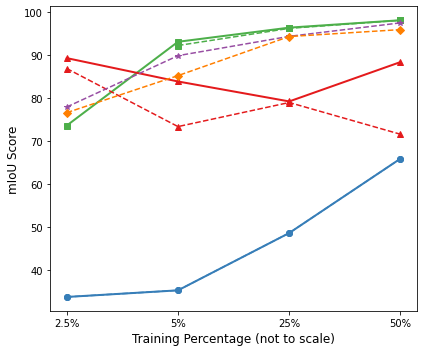

Church: Effective mIoU


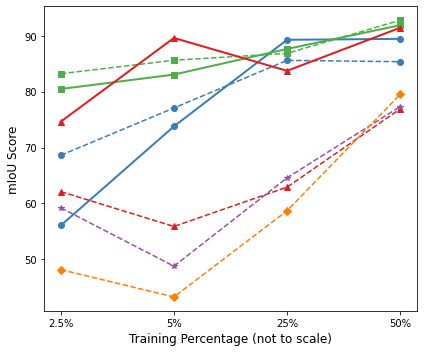

Lunnahoja: Effective mIoU


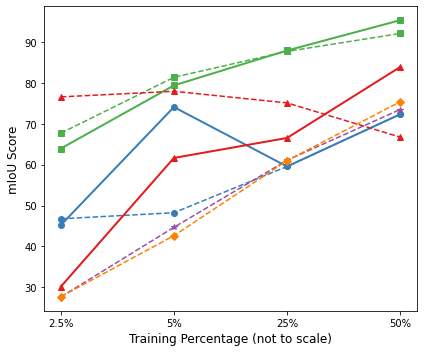

Montelupo: Effective mIoU


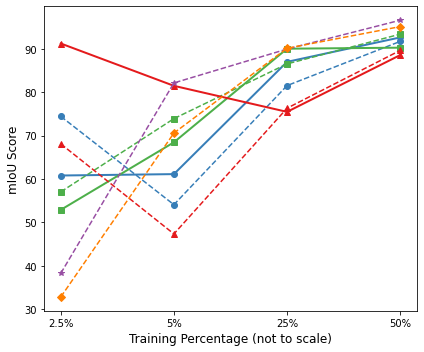

Monument: Effective mIoU


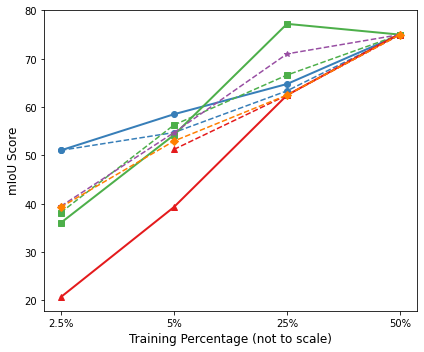

Piazza: Effective mIoU


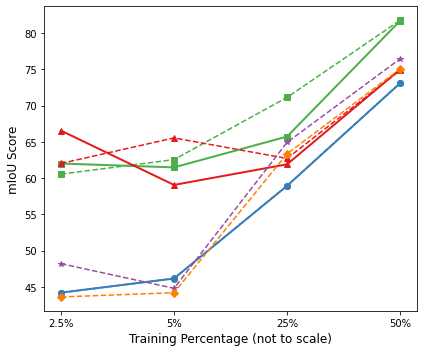

In [18]:
from Results_tables import mIoU_effective

for e in mIoU_effective.experiments:
    df = text_to_df(e.vals)
    generate_line_plot(e.scene, df, "Effective mIoU", root='effective_mIoU/')

# mIoU Improvement via Training %
An interesting observation is the relationship between increasing the training % and the overall mIoU performance.

For it to be efficient to increase the training% by X%, we expect at least X% increase in the effective performance.

How to show this? We could look just at the increase in performance but that doesn't account for the AMOUNT of increased training data being different.
Perhaps we subtract the amount of training data added. In theory an increase of X% training data should result in an increase by X% but what about times where the model was ALREADY very good? if its already predicting perfectly adding mroe training data won't help this.

In [ ]:
from Results_tables import training_percentage_improvement

for e in training_percentage_improvement.experiments:
    df = text_to_df(e.first)
    generate_line_plot(e.scene, df, "Validation Improvement via Training %", root='training_percentage_improvement/',
                       tpi=True, draw_zero=True)

    df = text_to_df(e.second)
    generate_line_plot(e.scene, df, "50% Holdout Improvement via Training %", root='training_percentage_improvement/',
                       tpi=True, draw_zero=True)

# Effective mIoU improvement by training %
The increase in effective mIoU over the previous training percentage

In [ ]:
from Results_tables import effective_training_percentage_improvement

for e in effective_training_percentage_improvement.experiments:
    df = text_to_df(e.vals)
    generate_line_plot(e.scene, df, "Effective mIoU Improvement via Training %", pretrained=False, root='effective_mIoU_training_percentage_improvement/', tpi=True)

# Effective training % improvement over labels
The increase in effective mIoU above the increased labelling percentage.
If the result of this is positive then adding more labelling at the start resulted in a better overall labelling than if you had just labelled less, run the network, and then finished the labelling afterwards.
`mIoU effective increase - additional labelling %`

In [ ]:
from Results_tables import effective_training_percentage_improvement_over_labels

for e in effective_training_percentage_improvement_over_labels.experiments:
    df = text_to_df(e.vals)
    generate_line_plot(e.scene, df, "Effective mIoU Improvement via Training % over labels", pretrained=False, root='effective_mIoU_training_percentage_improvement_over_labels/', tpi=True)

# Effective mIoU Improvement
`effective mIoU - base mIoU`
As the user labels a greater proportion of the data, so too does the influence of the model predictions on the overall labelling performance drop.

This metric measures the difference between the effective performance and the prediction performance.

Where we see big jumps in this (typically around 50% mark) we can say that the

In [ ]:
from Results_tables import mIoU_effective_improvement

for e in mIoU_effective_improvement.experiments:
    df = text_to_df(e.vals)
    generate_line_plot(e.scene, df, "Effective mIoU_improvement", pretrained=True, root='effective_mIoU_improvement/')

# mIoU improvement over pointnet++

In [ ]:
from Results_tables import mIoU_improvement_pointnet

for e in mIoU_improvement_pointnet.experiments:
    df = text_to_df(e.first)
    generate_line_plot(e.scene, df, "Validation Improvement over Pointnet++", root='improvement_over_pointnet++/',
                       )

    df = text_to_df(e.second)
    generate_line_plot(e.scene, df, "50% Holdout Improvement over Pointnet++", root='improvement_over_pointnet++/',
                       )

# mIoU improvement over Random Forests

In [ ]:
from Results_tables import mIoU_improvement_RF

for e in mIoU_improvement_RF.experiments:
    df = text_to_df(e.first)
    generate_line_plot(e.scene, df, "Validation Improvement over RF", root='improvement_over_RF/',
                       )

    df = text_to_df(e.second)
    generate_line_plot(e.scene, df, "50% Holdout Improvement over RF", root='improvement_over_RF/',
                       )

# Total Labelling Effort

In [ ]:
from Results_tables import total_labelling_effort

for e in total_labelling_effort.experiments:
    df = text_to_df(e.vals)
    generate_line_plot(e.scene, df, "Total Labelling Effort", root='total_labelling_effort/', y_axis_label="Total labelling effort % (←)")